<a href="https://colab.research.google.com/github/chitboon/it2154/blob/main/Data_Processing_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 4: Data Processing with Python

By the end of this practical you will be able to

* Perform basic data manipulation using Python and generator and iterator.
* Perform basic data manipulation and visualization using pandas dataframe


## Familiarizing with Jupyter Notebook

Jupyter notebook is an interactive execution environments for codes, e.g. Python. 
A note book consists of several cells. There are at least two types of cells. 

1. Markdown cell, i.e. like this current one you are reading. It gives you information such as instructions, examples and hints. It does not contain code.
1. Python code cell, i.e. the cell below. It contains the codes that we would like to edit and run.

To run a cell, press the "play icon" or press "shift-Enter"

In [1]:
print("This is a Python code cell.")

This is a Python code cell.


## Importing the needed library

Let's get started with the actual practical. First we would like to import the needed libraries.

Run the following Python code cell to import the libraries.

In [2]:
from math import * # a library that provides math functions
from functools import reduce
from pandas import *
import datetime

## Data collectiion

We analyze the Covid 19 cases around the world. 
The dataset is obtained from https://covid.ourworldindata.org/data/full_data.csv

For convenience we downloaded a copy, you can find it in the same folder where this note book is located.


## Exercise 1
In the following cell, use Python to open the file `full_data.csv`, store the content in a string variable called `content` and print out the `content`.

In [4]:
# TODO:
'''
f = open('full_data.csv', 'r')
content =""
for x in f:
    content = content+x

print(content)
'''
content = open('full_data.csv', 'r')
for x in content: 
    print(x)

Streaming output truncated to the last 5000 lines.
2020-01-31,Cambodia,0,,1,

2020-02-01,Cambodia,0,,1,

2020-02-02,Cambodia,0,,1,

2020-02-03,Cambodia,0,,1,

2020-02-04,Cambodia,0,,1,

2020-02-05,Cambodia,0,,1,

2020-02-06,Cambodia,0,,1,

2020-02-07,Cambodia,0,,1,

2020-02-08,Cambodia,0,,1,

2020-02-09,Cambodia,0,,1,

2020-02-10,Cambodia,0,,1,

2020-02-11,Cambodia,0,,1,

2020-02-12,Cambodia,0,,1,

2020-02-13,Cambodia,0,,1,

2020-02-14,Cambodia,0,,1,

2020-02-15,Cambodia,0,,1,

2020-02-16,Cambodia,0,,1,

2020-02-17,Cambodia,0,,1,

2020-02-18,Cambodia,0,,1,

2020-02-19,Cambodia,0,,1,

2020-02-20,Cambodia,0,,1,

2020-02-21,Cambodia,0,,1,

2020-02-22,Cambodia,0,,1,

2020-02-23,Cambodia,0,,1,

2020-02-24,Cambodia,0,,1,

2020-02-25,Cambodia,0,,1,

2020-02-26,Cambodia,0,,1,

2020-02-27,Cambodia,0,,1,

2020-02-28,Cambodia,0,,1,

2020-02-29,Cambodia,0,,1,

2020-03-01,Cambodia,0,,1,

2020-03-02,Cambodia,0,,1,

2020-03-03,Cambodia,0,,1,

2020-03-04,Cambodia,0,,1,

2020-03-05,Cambodia,0,,1,

2020

## Using Generator

Instead of reading everything from the file and store them in a string or list, it might be better to read the content out using Python Generator.

The following function `data_gen` takes a filepath as input and return a generator. Each element generated by the generator is a dictionary of shape 

`{'date': '2020-02-25', 'location': 'Afghanistan', 'new_cases': '', 'new_deaths': '', 'total_cases': '1', 'total_deaths': ''}` 

In [5]:
# count = 1
header = ["date","location","new_cases","new_deaths","total_cases","total_deaths"]
tabs = ["2020-02-25","Afghanistan","","","1",""]
list(zip(header,tabs))

[('date', '2020-02-25'),
 ('location', 'Afghanistan'),
 ('new_cases', ''),
 ('new_deaths', ''),
 ('total_cases', '1'),
 ('total_deaths', '')]

In [6]:
def listpair2dict(list_pair):
    d = {}
    for k,v in list_pair:
        d[k] = v
    return d

def data_gen(filename):
    count = 0
    headers = []
    for l in open(filename, 'r'):
        tabs = l.rstrip('\r\n').split(',')
        if count == 0:
            headers = tabs
        else:            
            yield listpair2dict(zip(headers,tabs))
        count = count + 1

To test out the generator, we defined a `data_stream_test` variable.

In [8]:

data_stream_test = data_gen("./full_data.csv")

Run the following to observe the result.

In [17]:
print(data_stream_test.__next__())
print(data_stream_test.__next__())

{'date': '2020-03-12', 'location': 'Afghanistan', 'new_cases': '3', 'new_deaths': '', 'total_cases': '7', 'total_deaths': ''}
{'date': '2020-03-13', 'location': 'Afghanistan', 'new_cases': '0', 'new_deaths': '', 'total_cases': '7', 'total_deaths': ''}


## Question

What would happen if we re-run the cell above over and over?


# Data cleaning


We can't use the data until it is clean.

There are a few issues here. 

1. The date field is a string, we need to convert its value into Python's `date` object. 
2. The `new_cases` field is in string, we need to convert its value to integer.
3. The `total_cases` field is in string, we need to convert its value to integer.

We want to convert the date fields into proper date format. 

For requirement 1 and 2, the code is provided for you below. 

## Exercise 2

Complete the `format_total_cases()` function to achieve requirement number 3.


In [18]:
def format_date(record):
    date_str = record["date"]
    y,m,d = date_str.split('-')
    date = datetime.date(int(y),int(m),int(d))
    record["date"]= date
    return record

def format_new_cases(record):
    new_cases_str = record["new_cases"]
    new_cases = 0 if new_cases_str == '' else int(new_cases_str)
    record["new_cases"] = new_cases
    return record

def format_total_cases(record):
    total_cases_str = record["total_cases"]
    total_cases = 0 if total_cases_str == '' else int(total_cases_str)
    record["total_cases"] = total_cases
    return record
    
def clean_data(records):
    for record in records:
        record = format_date(record)
        record = format_new_cases(record)
        record = format_total_cases(record)
        yield record

In [19]:
# data_stream_test = data_gen("./full_data.csv")
data_stream = data_gen("./full_data.csv")
cleaned_data_stream=clean_data(data_stream)

## Exercise 3

Create a data iterator which filter out only records with `location` equals to "Singapore".


In [20]:
def filter_data(records, country):
    for record in records:
        # yield record # TODO: FIXME
        if record["location"] == country:
            yield record
            

filtered_cleaned_data_stream = filter_data(cleaned_data_stream, "Singapore")

## Putting the data into a dataframe

Pandas library provides a good API tool for processing and visualizing data. 

First we load the filtered and cleaned data into a dataframe object.

In [21]:
covid19_data = pandas.DataFrame(filtered_cleaned_data_stream)

Let's check the first few rows of the data frame. Do you find it similar to excel table?

In [22]:
covid19_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-01-24,Singapore,0,,1,
1,2020-01-25,Singapore,2,,3,
2,2020-01-26,Singapore,1,,4,
3,2020-01-27,Singapore,0,,4,
4,2020-01-28,Singapore,3,,7,


## Data Visualization

We now be able to plot a line graph of the data.

In [23]:
covid19_data_indexed = covid19_data.set_index("date")

In [24]:
covid19_data_indexed.head()

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2020-01-24,Singapore,0,,1,
2020-01-25,Singapore,2,,3,
2020-01-26,Singapore,1,,4,
2020-01-27,Singapore,0,,4,
2020-01-28,Singapore,3,,7,


We use Pandas DataFrame filter syntax to filter records that's after 10th March 2020.

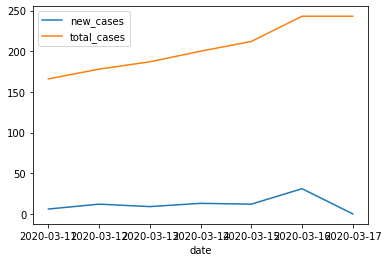

In [25]:
covid19_data_indexed[covid19_data_indexed.index>datetime.date(2020, 3, 10)].plot.line()

## Exercise 4

Generate another graph for Malaysia. 

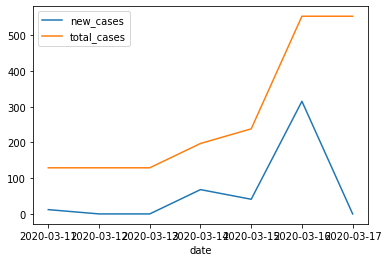

In [26]:
#TODO
data_stream_my = data_gen("./full_data.csv")
cleaned_data_stream_my =clean_data(data_stream_my)
filtered_cleaned_data_stream_my = filter_data(cleaned_data_stream_my, "Malaysia")
covid19_data_my = pandas.DataFrame(filtered_cleaned_data_stream_my)
covid19_data_my_indexed = covid19_data_my.set_index("date")
covid19_data_my_indexed[covid19_data_my_indexed.index>datetime.date(2020, 3, 10)].plot.line()